# Day 5

## Import necessary libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

## Load the dataset

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train the dataset

In [3]:
data['Species'] = pd.DataFrame(iris.target) # Add a column with the target values. The target here is the species.
'''
data.iloc means that we are using the index location, which is specified through the iloc[row,column]
: means we are using all the rows/columns
1 means we are using the first row/column
-1 means we are using the last row/column
:, :-1 means that we are using all the rows and all the columns except the last one. We use these data (X) to train our model.
:, -1 means that we are using all the rows and the last column. We use these data (y) to test our model.
'''
X = data.iloc[:,:-1]    # DataFrame of the features
y = data.iloc[:,-1]    # DataFrame of the target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)   # Split the data into training and testing sets. size 0.3 means that we are using 30% of the data for testing.
model = KNeighborsClassifier(n_neighbors = 5)   # Create a KNN model with 5 neighbors. 5 neighbors mean that we are using 5 points to predict the target.
model.fit(X_train,y_train)  # Train the model
y_pred = model.predict(X_test)  # Predict the target
print(accuracy_score(y_pred,y_test).round(2)*100)   # Print the accuracy of the model.

96.0


## Run the tests and plot the results

1 : 96.0
2 : 93.0
3 : 96.0
4 : 96.0
5 : 96.0
6 : 96.0
7 : 96.0
8 : 96.0
9 : 96.0
10 : 96.0
11 : 96.0
12 : 96.0
13 : 93.0
14 : 96.0
15 : 93.0
16 : 96.0
17 : 96.0
18 : 93.0
19 : 96.0
20 : 93.0
21 : 91.0
22 : 91.0
23 : 93.0
24 : 93.0
25 : 93.0


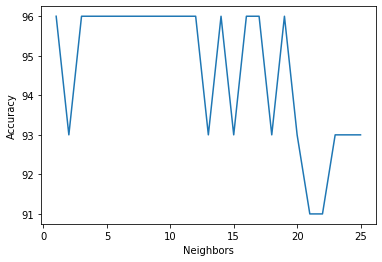

In [4]:

score = []  # Create an empty list to store the accuracy of the model we will use later on.
k_range = range(1,26)   # Create a range of numbers from 1 to 25. We will use this range to limit our model testing loop.

'''
We will now use a for loop to test our model with different values of k, for 25 loops.
Each loop will increment the number of neighbors by 1.
We will then train and test our data, printing the accuracy of each model after each loop.
We will continue to append the scored in out dataset, which we will then use to plot an accuracy graph.
'''
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)   # Create a KNN model with k neighbors.
    model.fit(X_train,y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict the target
    score.append(accuracy_score(y_pred,y_test).round(2)*100)    # Append the accuracy of the model to the score list.
    print(k,':',score[k-1])  # Print the accuracy of the model.


%matplotlib inline
plt.plot(k_range,score)  # Plot the accuracy graph as neighbours v/s accuracy score.
plt.xlabel('Neighbors')  # Label the x-axis.
plt.ylabel('Accuracy')  # Label the y-axis.
plt.show()  # Show the graph.